In [1]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

2023-03-19 14:15:11.594676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 14:15:11.704120: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 14:15:11.704150: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 14:15:12.427810: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ann import ann
import ann_utils
import train_utils
import gd

In [3]:
# Set Hyperparameters
epochs = 10
ann.num_layers = 5
ann.hidden_size = 4
ann.batch_size = 1000

In [4]:
## Functions
# ann.activation = ann_utils.tanh
# ann.d_activation = ann_utils.d_tanh
ann.activation = ann_utils.relu
ann.d_activation = ann_utils.d_relu
ann.weight_init = ann_utils.xavier_init

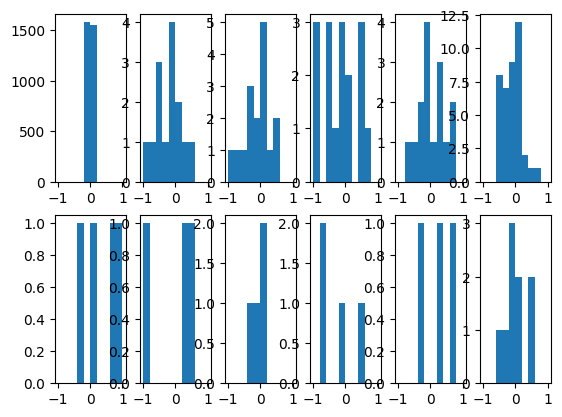

In [5]:
# Define an ANN.
nn = ann(28 * 28, 10)
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

In [6]:
# Train the ANN.

for i in range(epochs):
    gd.batch_gd(nn, X_train, y_train)

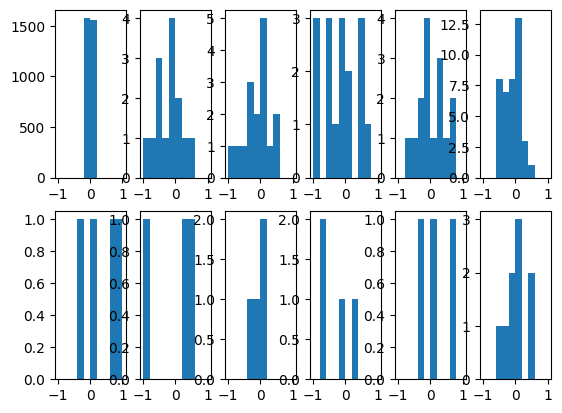

In [7]:
ann_utils.view_weights_distribution(nn, ann.num_layers, -1, 1)

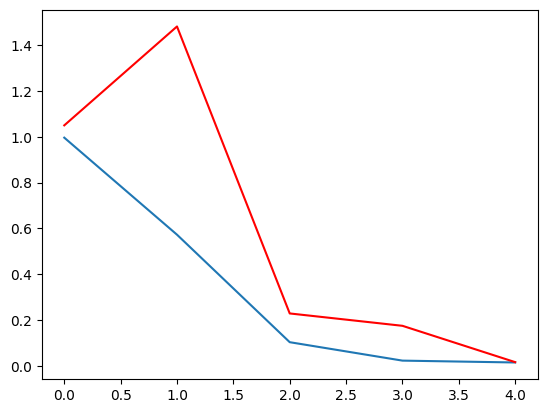

In [8]:
i, j = 1, 500
u = nn.predict(X_train[i])
ua = nn.a
uh = nn.h

v = nn.predict(X_train[j])
va = nn.a
vh = nn.h

diffa = []
diffh = []

for i in range(len(va)):
    diffh.append(np.linalg.norm(vh[i] - uh[i]))
    diffa.append(np.linalg.norm(va[i] - ua[i]))

plt.plot(diffh)
plt.plot(diffa, 'r')

In [9]:
print(ua[0])
print(va[0])
print(uh[0])
print(vh[0])

[[ 0.81347871]
 [-0.1430764 ]
 [ 0.65503228]
 [ 1.78673512]]
[[ 4.50688857e-01]
 [ 3.08345444e-01]
 [-7.52307728e-04]
 [ 1.20684321e+00]]
[[0.81347871]
 [0.        ]
 [0.65503228]
 [1.78673512]]
[[0.45068886]
 [0.30834544]
 [0.        ]
 [1.20684321]]


In [12]:
X_valid = X_train[0:10000]
y_valid = y_train[0:10000]
train_utils.get_accuracy(nn, X_valid, y_valid)

0.1016